<a href="https://colab.research.google.com/github/JinMyungPark/datasets/blob/master/mnist_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import time
import numpy as np

In [ ]:
tf.keras.datasets.mnist.load_data

Help on function load_data in module tensorflow.python.keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    
    Arguments:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).
    
    Returns:
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    
        **x_train, x_test**: uint8 arrays of grayscale image data with shapes
          (num_samples, 28, 28).
    
        **y_train, y_test**: uint8 arrays of digit labels (integers in range 0-9)
          with shapes (num_samples,).
    
    License:
        Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
        which is a derivative work from original NIST datasets.
  

In [ ]:
np.transpose(10)

array(10)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

import pandas as pd
y_train = pd.get_dummies(y_train)
y_test= pd.get_dummies(y_test)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)



(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [ ]:
X = tf.keras.layers.Input(shape=[784])
H = tf.keras.layers.Dense(392, activation=tf.keras.activations.swish)(X)
H = tf.keras.layers.Dense(196, activation=tf.keras.activations.swish)(H)
Y = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)(H)
oModel = tf.keras.models.Model(X, Y)

In [ ]:
oModel.compile(loss=tf.keras.losses.categorical_crossentropy,
               metrics=tf.keras.metrics.Accuracy())
oHistory = oModel.fit(x_train, y_train, epochs=10, batch_size=196, shuffle=True, validation_split= 0.2)

Epoch 1/10
245/245 [==============================] - 3s 14ms/step - loss: 4.9287 - accuracy: 0.3383 - val_loss: 0.7835 - val_accuracy: 0.1662
Epoch 2/10
245/245 [==============================] - 3s 14ms/step - loss: 0.5319 - accuracy: 0.1489 - val_loss: 0.4377 - val_accuracy: 0.0892
Epoch 3/10
245/245 [==============================] - 3s 14ms/step - loss: 0.3010 - accuracy: 0.1181 - val_loss: 0.4077 - val_accuracy: 0.0544
Epoch 4/10
245/245 [==============================] - 3s 13ms/step - loss: 0.2093 - accuracy: 0.1377 - val_loss: 0.2916 - val_accuracy: 0.1314
Epoch 5/10
245/245 [==============================] - 3s 14ms/step - loss: 0.1836 - accuracy: 0.1779 - val_loss: 0.2739 - val_accuracy: 0.1674
Epoch 6/10
245/245 [==============================] - 3s 13ms/step - loss: 0.1512 - accuracy: 0.2050 - val_loss: 0.3421 - val_accuracy: 0.2230
Epoch 7/10
245/245 [==============================] - 3s 14ms/step - loss: 0.1338 - accuracy: 0.2375 - val_loss: 0.2510 - val_accuracy: 0.2039

In [ ]:
#평가
oModel.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3211 - accuracy: 0.3773


[0.3211357891559601, 0.37727001309394836]

In [ ]:
oHistory.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

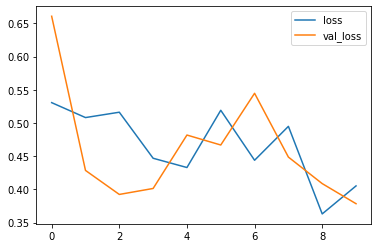

In [ ]:
plt.plot(oHistory.history['loss'])
plt.plot(oHistory.history['val_loss'])
plt.legend(['loss', 'val_loss'])

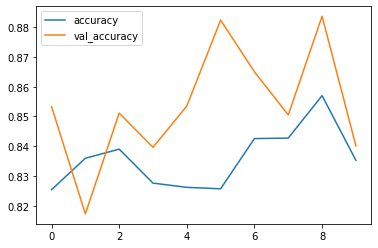

In [ ]:
plt.plot(oHistory.history['accuracy'])
plt.plot(oHistory.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0


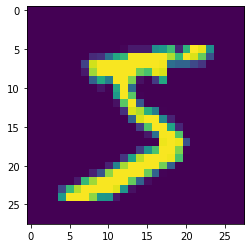

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28,28))
y_train[:1]

In [ ]:
!git clone https://github.com/JinMyungPark/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 54 (delta 5), reused 11 (delta 4), pack-reused 0
Unpacking objects: 100% (54/54), done.
Checking out files: 100% (47/47), done.


In [ ]:
ls -ltr

total 8
drwxr-xr-x 1 root root 4096 Oct  1 16:28 sample_data/
drwxr-xr-x 4 root root 4096 Oct  6 07:05 datasets/


In [4]:
cd datasets/


[Errno 2] No such file or directory: 'datasets/'
/content/datasets


In [5]:
ls -ltr


total 13672
-rw-r--r-- 1 root root     372 Oct  6 07:05 H_test_mean_exposure.csv
-rw-r--r-- 1 root root     342 Oct  6 07:05 H_test_mean_bread.csv
-rw-r--r-- 1 root root    1212 Oct  6 07:05 H_test_mean_AS_leadtime.csv
-rw-r--r-- 1 root root     170 Oct  6 07:05 H_test_ANOVA_twoway_factorial.csv
-rw-r--r-- 1 root root     108 Oct  6 07:05 H_test_ANOVA_twoway_block.csv
-rw-r--r-- 1 root root     153 Oct  6 07:05 H_test_ANOVA_oneway.csv
-rw-r--r-- 1 root root  599441 Oct  6 07:05 ClinicalTrials.gov_COVID_19.csv
-rw-r--r-- 1 root root 3185189 Oct  6 07:05 ICTRP_COVID_19.csv
drwxr-xr-x 2 root root    4096 Oct  6 07:05 ICTRP_weekly/
-rw-r--r-- 1 root root   13919 Oct  6 07:05 download.png
-rw-r--r-- 1 root root    3694 Oct  6 07:05 example_2015_expenditure.csv
-rw-r--r-- 1 root root    7901 Oct  6 07:05 ex_19_prob.csv
-rw-r--r-- 1 root root    1571 Oct  6 07:05 ex_19_Freq.csv
-rw-r--r-- 1 root root  305887 Oct  6 07:05 example_2015_expenditure_┐°║╗┤δ╖╬.csv
-rw-r--r-- 1 root root   11872 Oct